<a href="https://colab.research.google.com/github/rakesh22230/Data-Mining-Lab/blob/main/LogistitcRegression_AdaboostClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Implement Logistic Regression and Adaboost classification on same data set using python .

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

# Load dataset
df = pd.read_csv("/content/bottle.csv")

# Select relevant columns
df_extracted = df[["Salnty", "T_degC"]].dropna()

# Create classification target: High temp (1) or Low temp (0)
median_temp = df_extracted["T_degC"].median()
df_extracted["Temp_Label"] = (df_extracted["T_degC"] > median_temp).astype(int)

df_extracted.head()


,Salnty,T_degC,Temp_Label
0,33.440,10.50,1
1,33.440,10.46,1
2,33.437,10.46,1
3,33.420,10.45,1
4,33.421,10.45,1


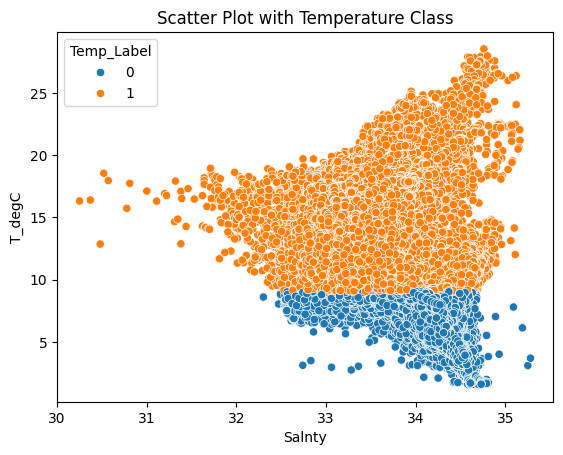

In [2]:
#Plot Dataset
sns.scatterplot(data=df_extracted, x="Salnty", y="T_degC", hue="Temp_Label")
plt.title("Scatter Plot with Temperature Class")
plt.show()


In [3]:
#Prepare Train/Test Data
x = np.array(df_extracted["Salnty"]).reshape(-1, 1)
y = np.array(df_extracted["Temp_Label"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [4]:
#Logistic Regression
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled, y_train)

y_pred_log = log_reg.predict(x_test_scaled)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))


Logistic Regression Results
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     12505
           1       0.87      0.82      0.84     12416

    accuracy                           0.85     24921
   macro avg       0.85      0.85      0.85     24921
weighted avg       0.85      0.85      0.85     24921

[[10963  1542]
 [ 2233 10183]]


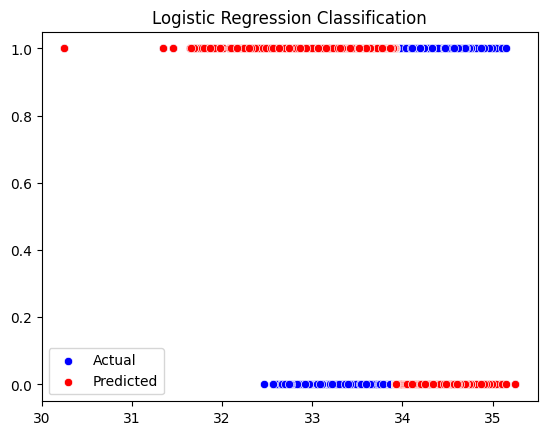

In [5]:
#Logistic Regression Decision Boundary Visualization
sns.scatterplot(x=x_test.reshape(-1), y=y_test, color='blue', label="Actual")
sns.scatterplot(x=x_test.reshape(-1), y=y_pred_log, color='red', label="Predicted")
plt.title("Logistic Regression Classification")
plt.show()


In [6]:
#AdaBoost Classification
ada = AdaBoostClassifier(n_estimators=100)

ada.fit(x_train_scaled, y_train)

y_pred_ada = ada.predict(x_test_scaled)

print("AdaBoost Classification Results")
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))


AdaBoost Classification Results
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     12505
           1       0.89      0.80      0.84     12416

    accuracy                           0.85     24921
   macro avg       0.86      0.85      0.85     24921
weighted avg       0.86      0.85      0.85     24921

[[11298  1207]
 [ 2471  9945]]


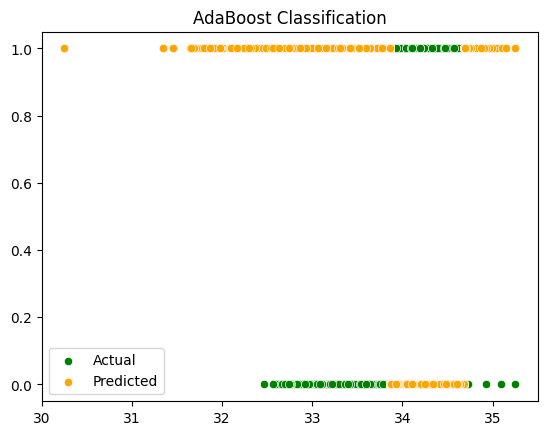

In [7]:
#AdaBoost Visualization
sns.scatterplot(x=x_test.reshape(-1), y=y_test, color='green', label="Actual")
sns.scatterplot(x=x_test.reshape(-1), y=y_pred_ada, color='orange', label="Predicted")
plt.title("AdaBoost Classification")
plt.show()
